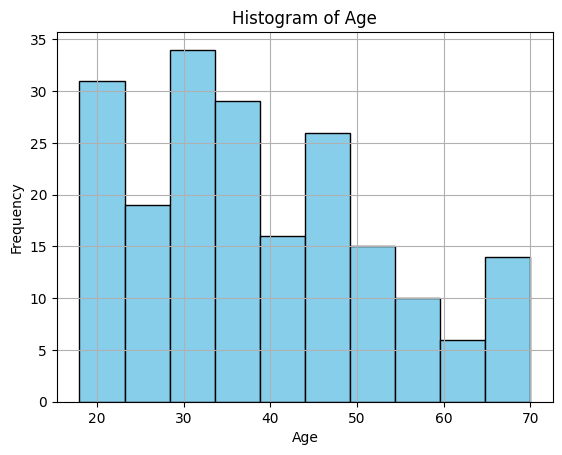

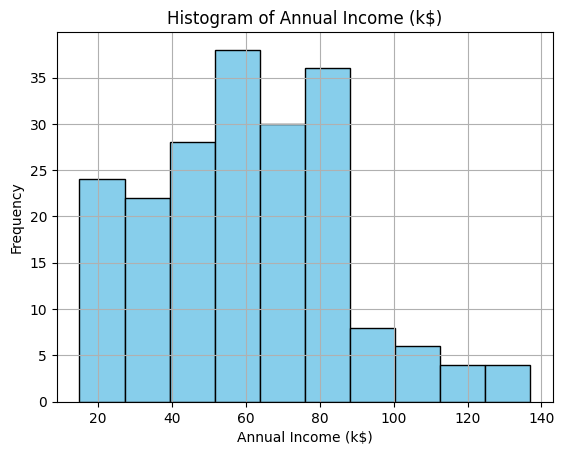

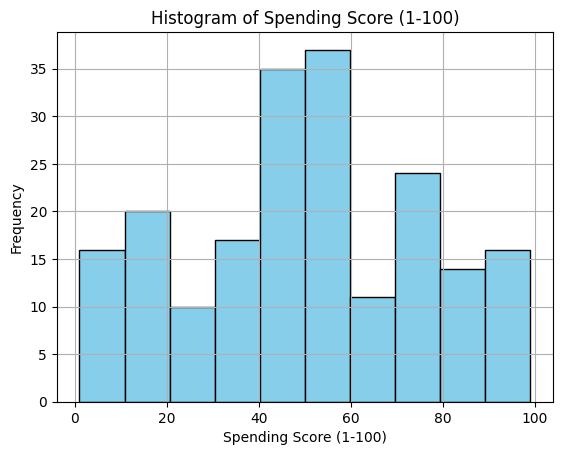

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customers_dataset.csv")

numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for column in numerical_columns:
    plt.figure()  
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

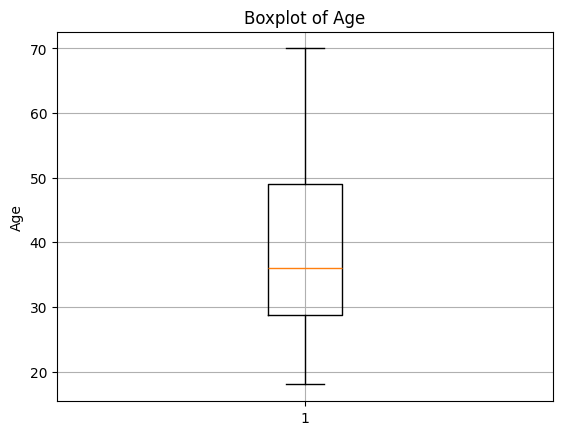

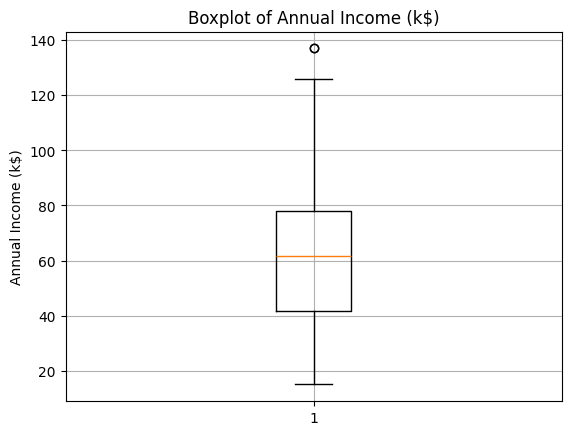

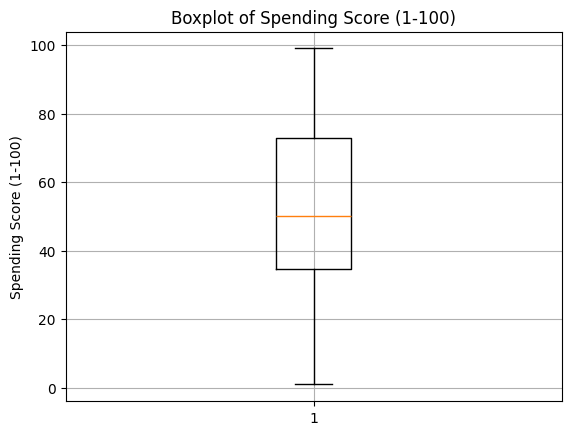

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customers_dataset.csv")

numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for column in numerical_columns:
    plt.figure()  
    plt.boxplot(df[column])  
    plt.title("Boxplot of " + column)  
    plt.ylabel(column)  
    plt.grid(True)  
    plt.show()

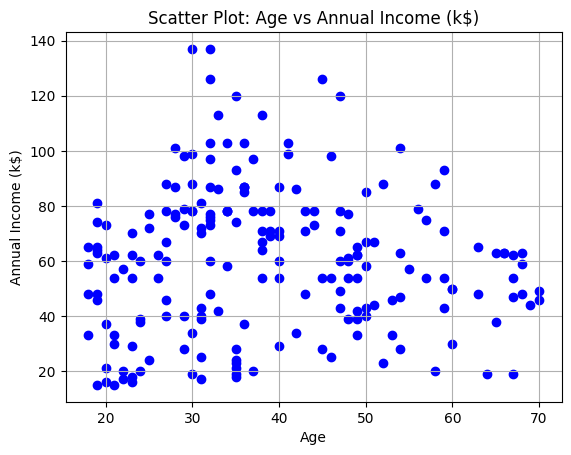

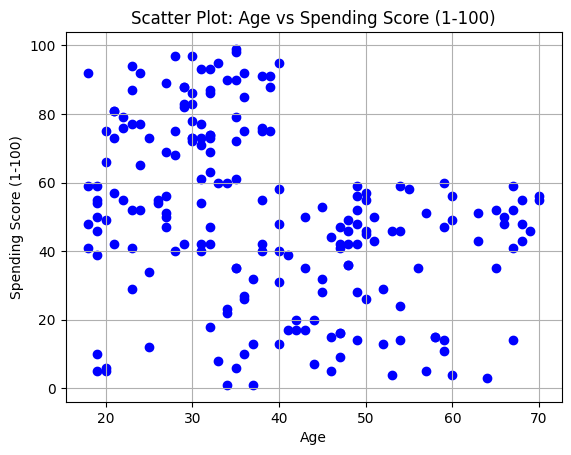

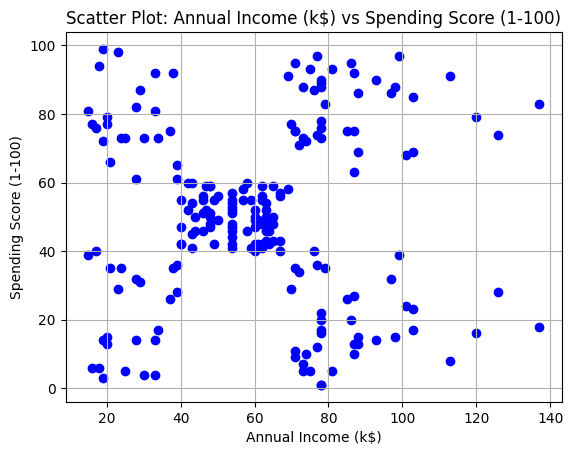

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customers_dataset.csv")

column_pairs = [
    ('Age', 'Annual Income (k$)'),
    ('Age', 'Spending Score (1-100)'),
    ('Annual Income (k$)', 'Spending Score (1-100)')
]

for x_col, y_col in column_pairs:
    plt.figure()
    plt.scatter(df[x_col], df[y_col], color='blue')
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

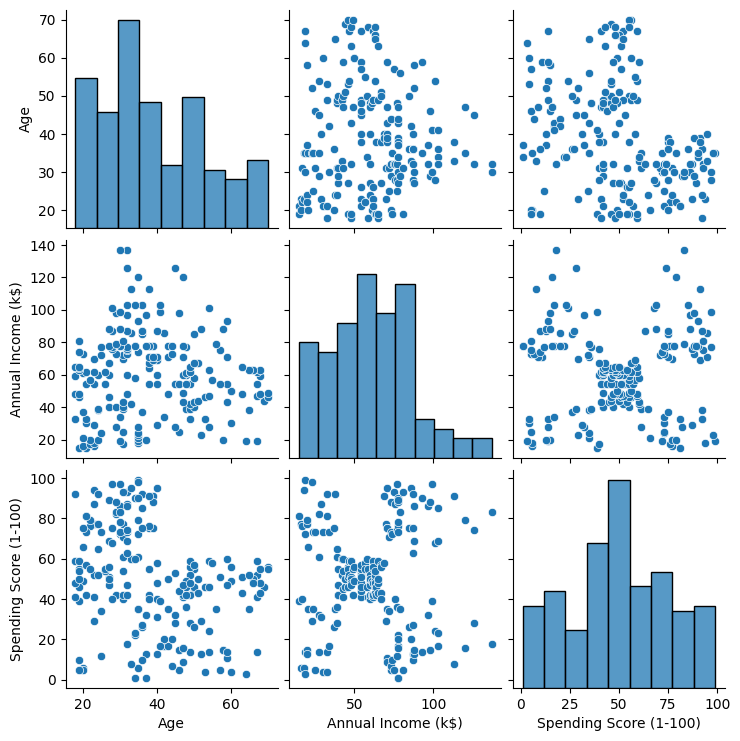

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customers_dataset.csv")

numerical_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

sns.pairplot(numerical_data)
plt.show()

In [1]:
#Age: 0.49 → Slightly right-skewed (longer tail on the right)
#Annual Income (k$): 0.32 → Slightly right-skewed
#Spending Score (1-100): -0.05 → Approximately symmetric (normal)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("customers_dataset.csv")

df_transformed = df.copy()

df_transformed['Age_log'] = np.log(df['Age'])
df_transformed['Annual Income_log'] = np.log(df['Annual Income (k$)'])

scaler_standard = StandardScaler()
df_transformed['Age_standard'] = scaler_standard.fit_transform(df[['Age']])
df_transformed['Annual Income_standard'] = scaler_standard.fit_transform(df[['Annual Income (k$)']])
df_transformed['Spending Score_standard'] = scaler_standard.fit_transform(df[['Spending Score (1-100)']])

scaler_minmax = MinMaxScaler()
df_transformed['Age_minmax'] = scaler_minmax.fit_transform(df[['Age']])
df_transformed['Annual Income_minmax'] = scaler_minmax.fit_transform(df[['Annual Income (k$)']])
df_transformed['Spending Score_minmax'] = scaler_minmax.fit_transform(df[['Spending Score (1-100)']])

print(df_transformed.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

    Age_log  Annual Income_log  Age_standard  Annual Income_standard  \
0  2.944439           2.708050     -1.424569               -1.738999   
1  3.044522           2.708050     -1.281035               -1.738999   
2  2.995732           2.772589     -1.352802               -1.700830   
3  3.135494           2.772589     -1.137502               -1.700830   
4  3.433987           2.833213     -0.563369               -1.662660   

   Spending Score_standard  Age_minmax  Annual Income_minmax  \
0                -0.434801    0.019231              0.0000

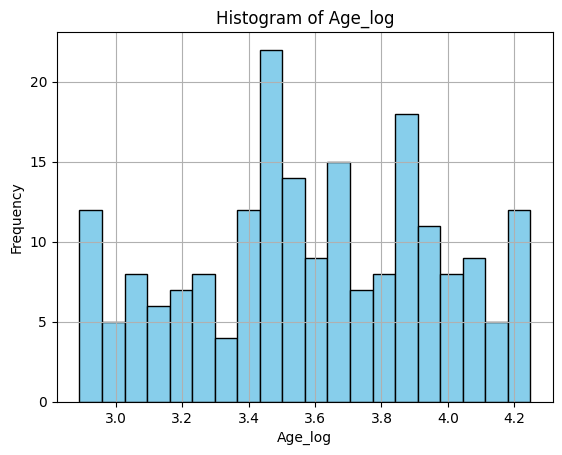

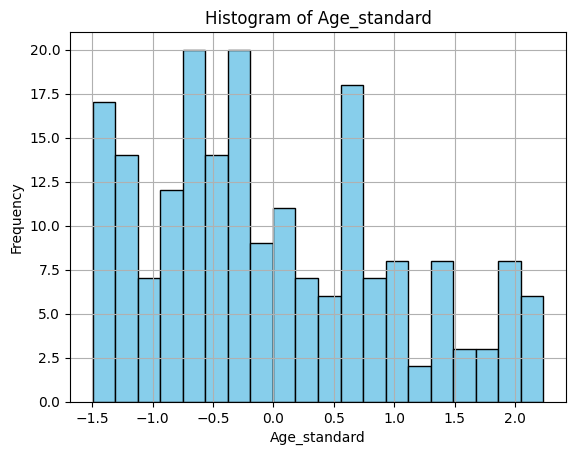

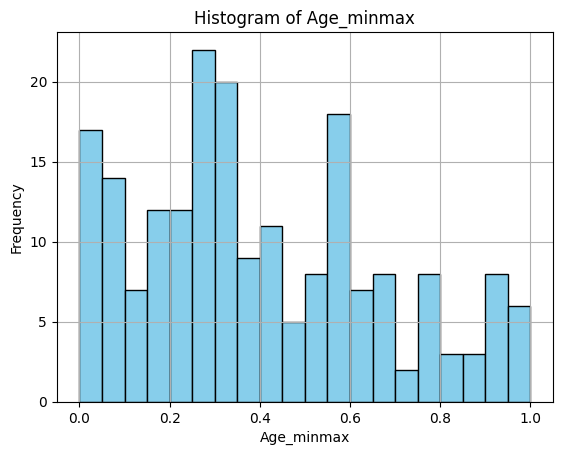

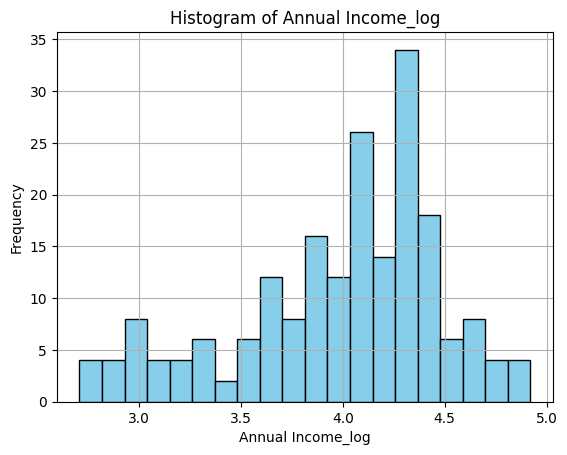

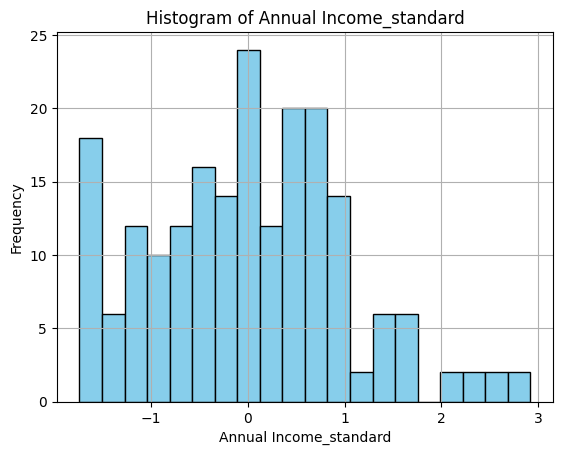

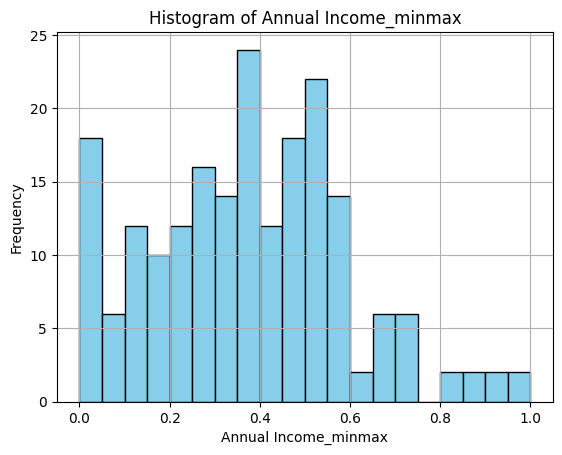

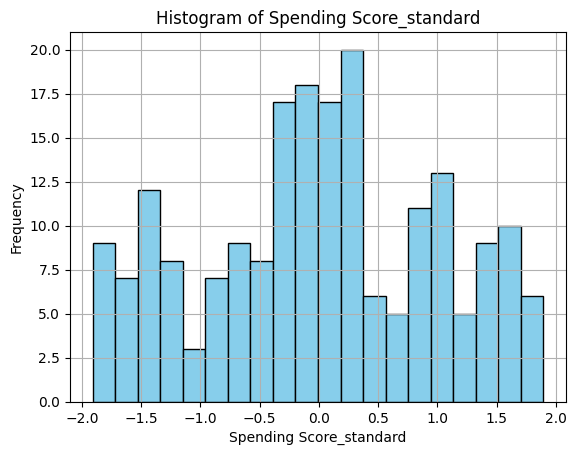

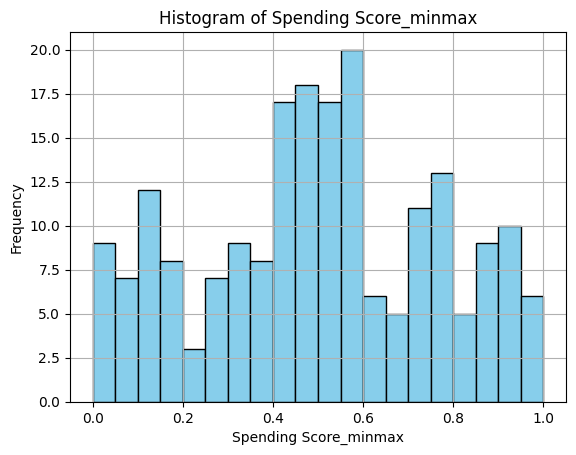

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customers_dataset.csv")

transformed_columns = [
    'Age_log', 'Age_standard', 'Age_minmax',
    'Annual Income_log', 'Annual Income_standard', 'Annual Income_minmax',
    'Spending Score_standard', 'Spending Score_minmax'
]

for column in transformed_columns:
    plt.figure()
    plt.hist(df_transformed[column], bins=20, color='skyblue', edgecolor='black')
    plt.title("Histogram of " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [6]:
#Feature	    Original Mean	Original Std	Original Skew	Scaled Mean	Scaled Std	Scaled Skew
#Age	            38.85	     13.97	           0.49	          -0.0	       1.0	        0.49
#Annual Income (k$)	60.56	     26.26	           0.32	          -0.0	       1.0	        0.32
#Spending Score	    50.20	     25.82	          -0.05	          -0.0	       1.0	        -0.05

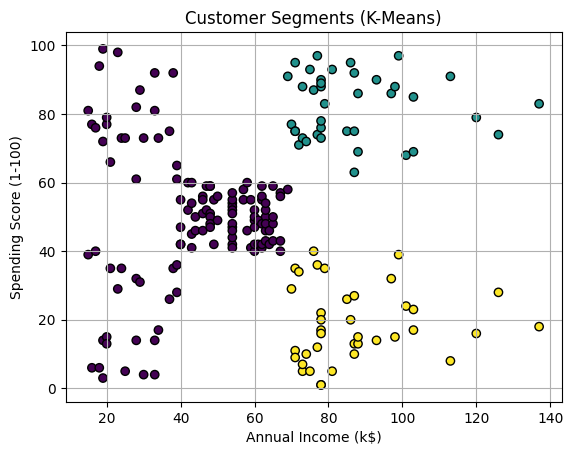

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("customers_dataset.csv")

x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)

df['Cluster'] = kmeans.labels_

plt.figure()
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', edgecolors='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means)')
plt.grid(True)
plt.show()

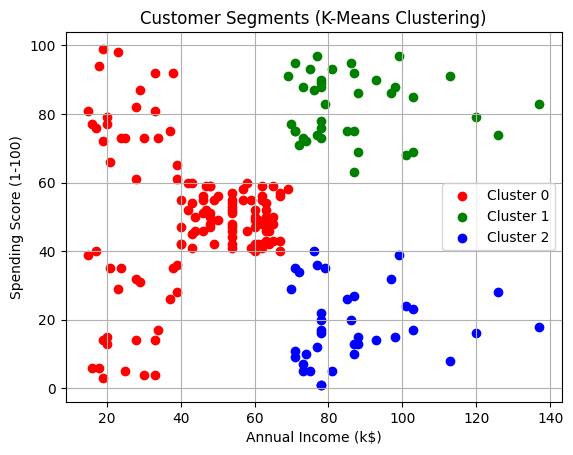

In [4]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(df[df['Cluster'] == 0]['Annual Income (k$)'], 
            df[df['Cluster'] == 0]['Spending Score (1-100)'],
            color='red', label='Cluster 0')

plt.scatter(df[df['Cluster'] == 1]['Annual Income (k$)'], 
            df[df['Cluster'] == 1]['Spending Score (1-100)'],
            color='green', label='Cluster 1')

plt.scatter(df[df['Cluster'] == 2]['Annual Income (k$)'], 
            df[df['Cluster'] == 2]['Spending Score (1-100)'],
            color='blue', label='Cluster 2')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.grid(True)
plt.show()

#Annual Income (k$)	Spending Score	Cluster
#   15	               39	          1
#   15	               81	          1
#   16	                6	          1
#   16	               77	          1
#   17	               40	          1

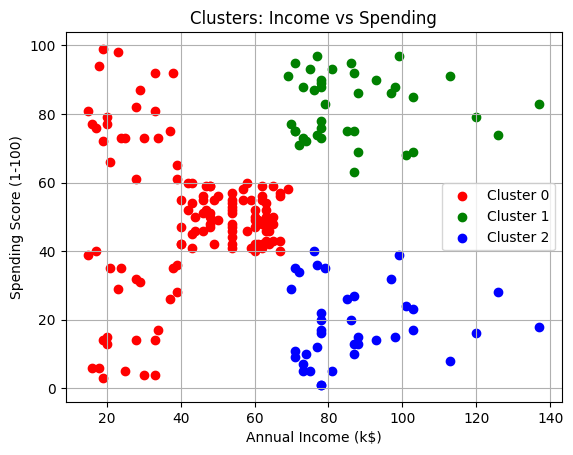

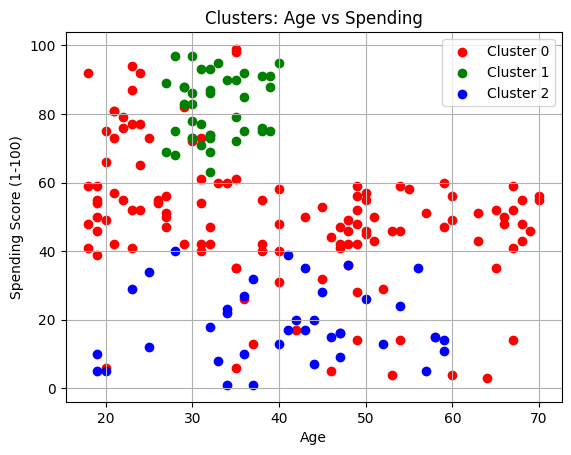

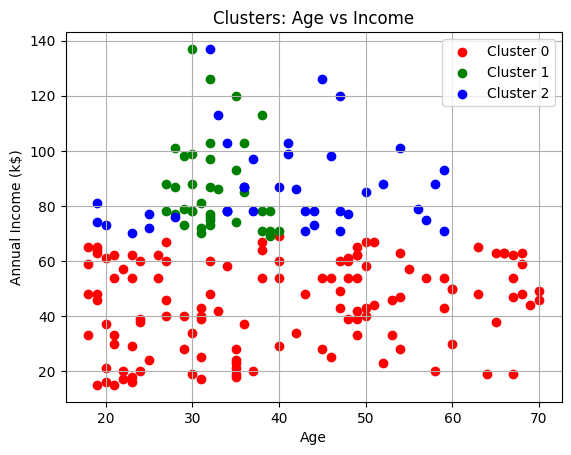

In [5]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

plt.figure()
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=colors[cluster], label='Cluster ' + str(cluster))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters: Income vs Spending')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'],
                color=colors[cluster], label='Cluster ' + str(cluster))
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters: Age vs Spending')
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'],
                color=colors[cluster], label='Cluster ' + str(cluster))
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters: Age vs Income')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
centers = kmeans.cluster_centers_

print("Cluster Centers:")

for cluster_number in range(len(centers)):
    income = centers[cluster_number][0]
    score = centers[cluster_number][1]
    
    print("Cluster", cluster_number, 
          ": Income =", round(income, 2), 
          ", Score =", round(score, 2))
    
# Cluster	Avg. Income (k$)	Avg. Spending Score	       Segment Description
#  2	        87.0	              18.6	           High-income, low-spenders
#  0	        44.15	              49.8	           Medium-income, medium-spenders
#  1	        86.5	              82.1	           High-income, high-spenders

Cluster Centers:
Cluster 0 : Income = 44.15 , Score = 49.83
Cluster 1 : Income = 86.54 , Score = 82.13
Cluster 2 : Income = 87.0 , Score = 18.63


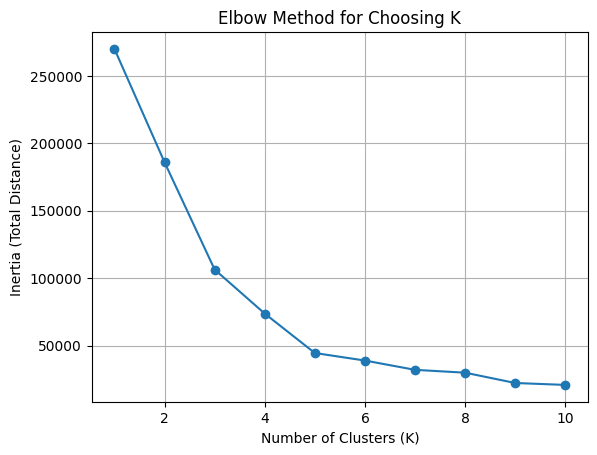

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia_values = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(x)
    inertia = model.inertia_ 
    inertia_values.append(inertia)

plt.figure()
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Choosing K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Total Distance)')
plt.grid(True)
plt.show()